<br/>

### Importing Libraries

<br/>

In [0]:
# Import Framework
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import mnist Dataset
from tensorflow.keras.datasets import mnist

<br/>

### Testing/Understanding the Dataset

<br/>

In [0]:
# Loading the Dataset from mnist
(X_train, X_test), (y_train, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


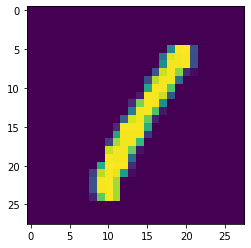

In [0]:
# Showing 4rd Image in Training Set
plt.imshow(X_train[3])

In [0]:
# Normalizing the Dataset
X_train = X_train / 255
y_train = y_train / 255

# Vectorizing the Dataset
X_train = X_train.reshape(60000, 28, 28, 1)
y_train = y_train.reshape(10000, 28, 28, 1)

<br/>

### Building the Model

<br/>

In [0]:
# Building the Model

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [0]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
# Defining Optimization, Loss Function, and Metrics of the Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<br/>

### Training the Model

<br/>

In [0]:
# Training the Model using the Training and Test Data
history = model.fit(X_train, X_test, batch_size = 128, epochs = 30, verbose = 1, validation_data = (y_train, y_test))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0361 - val_accuracy: 0.9935
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0329 - val_accuracy: 0.9930
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0358 - val_accuracy: 0.9932
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0357 - val_accuracy: 0.9937
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0448 - val_accuracy: 0.9926
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0422 - val_accuracy: 0.9931
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0436 - val_accuracy: 0.9923
Epoch 

<br/>

### Testing the Model

<br/>

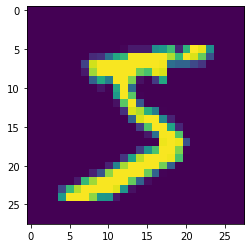

In [0]:
# Showing 1st Image in Training Set to test the Model
plt.imshow(X_train[0])

In [0]:
# Predicting the outcome of the 1st Image in Training Set
predictions = model.predict(X_train)
np.argmax(predictions[0])

<br/>

### Saving the Model

<br/>

In [0]:
# Saving the Model
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets
